In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

/var/folders/yr/1nqwsq391_g0xqbfvxl8g0wh0000gp/T/ipykernel_1736/318566212.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  smoothed_df = pd.concat([smoothed_df, temp_df], ignore_index=True)


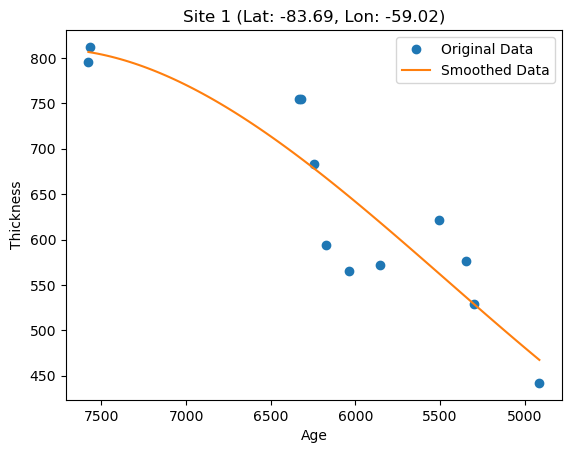

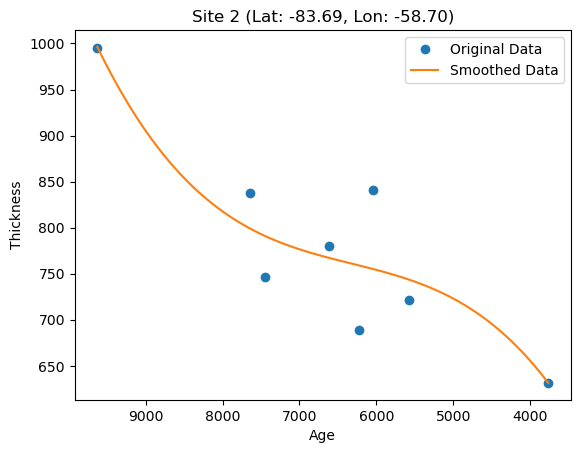

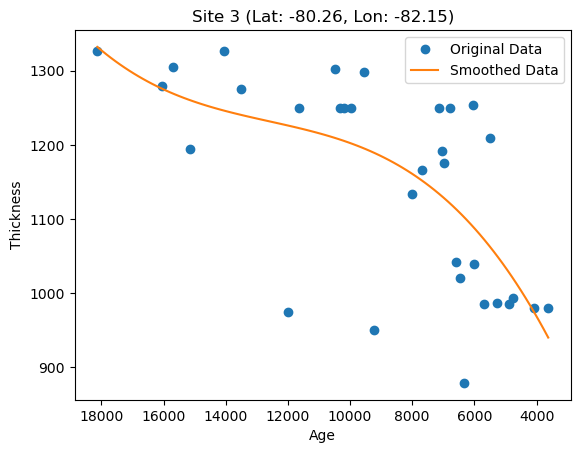

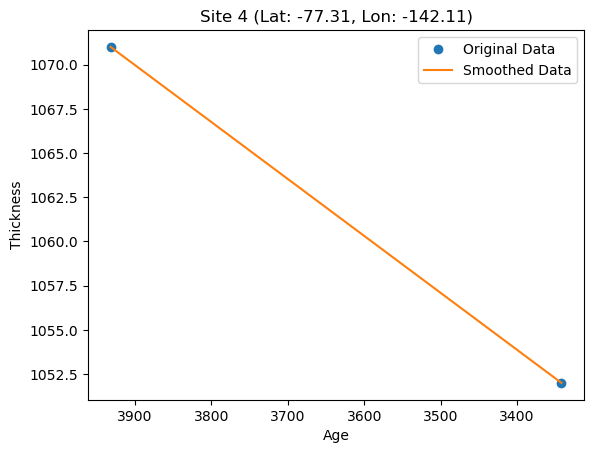

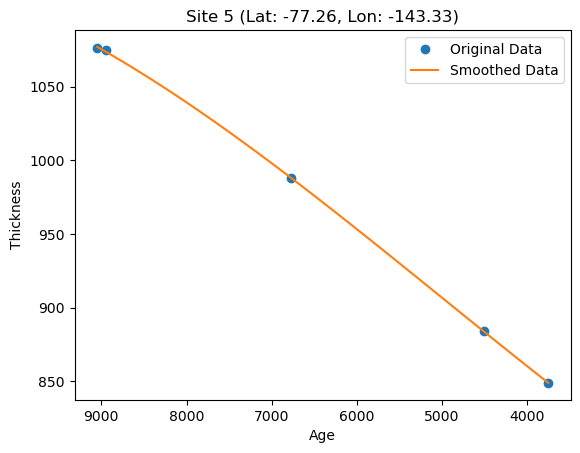

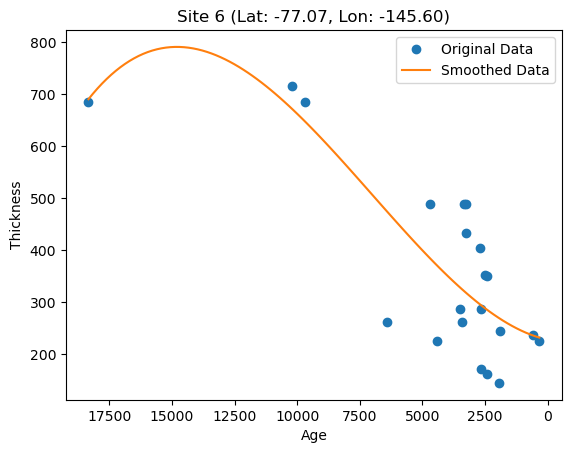

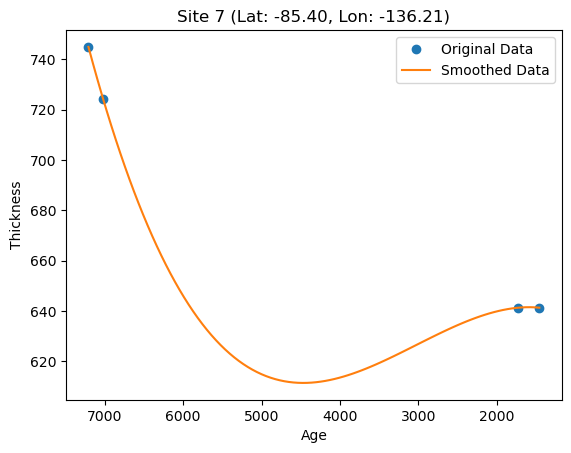

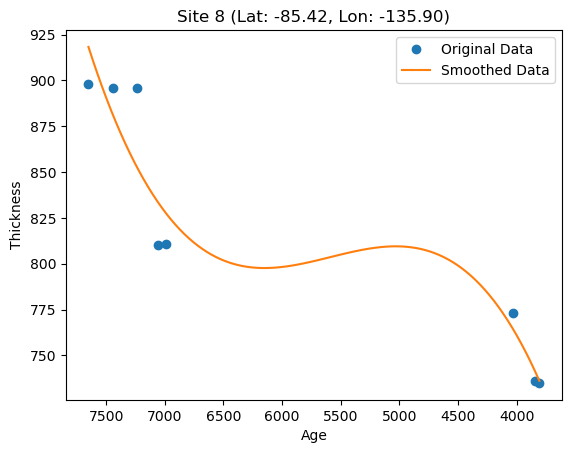

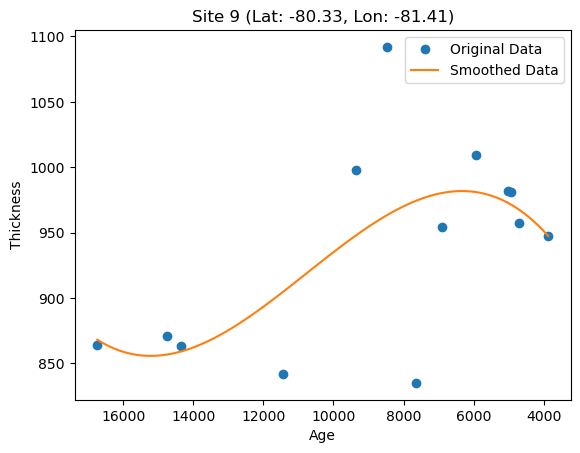

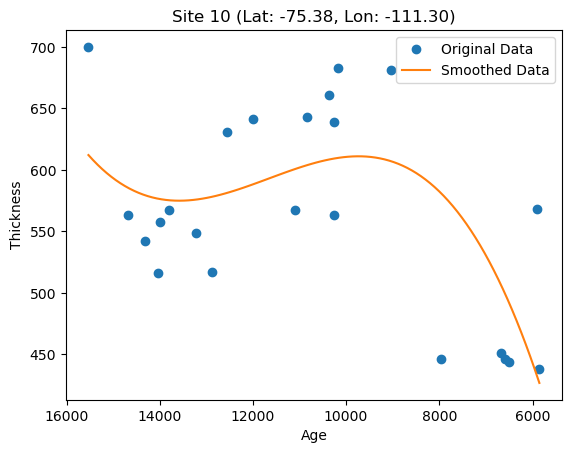

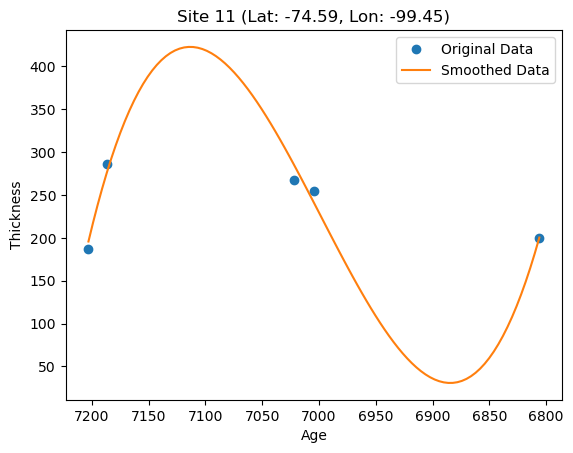

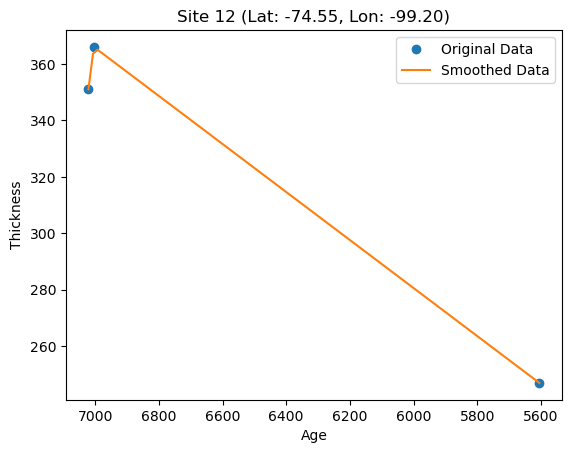

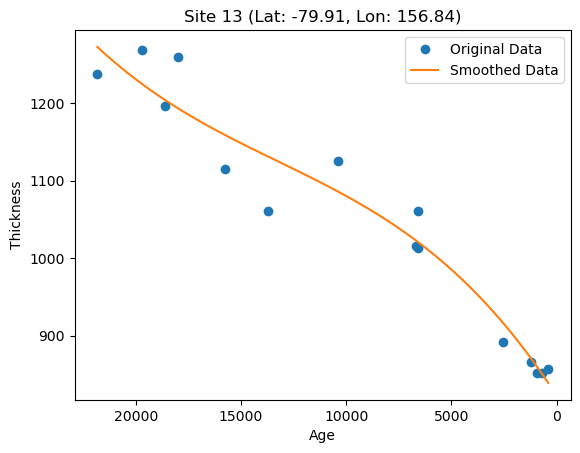

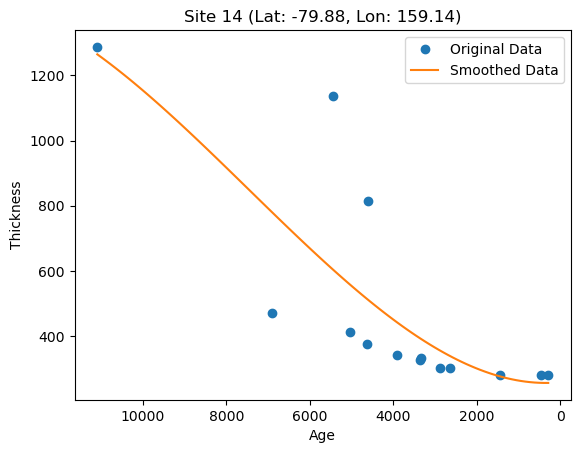

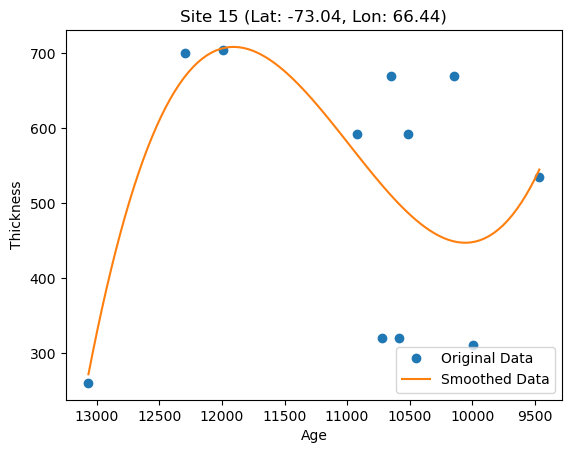

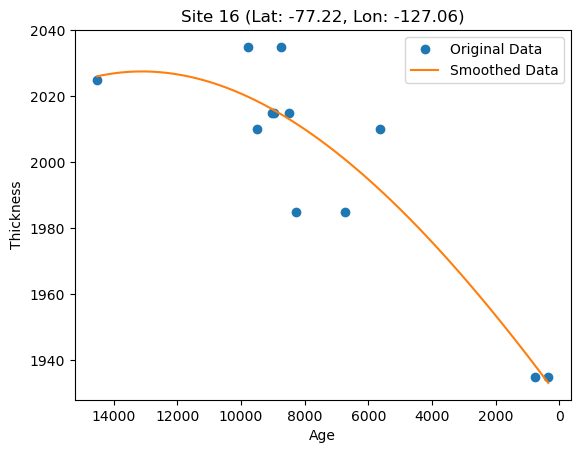

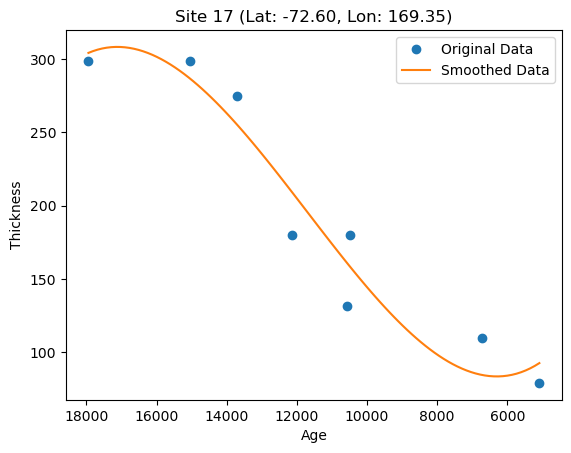

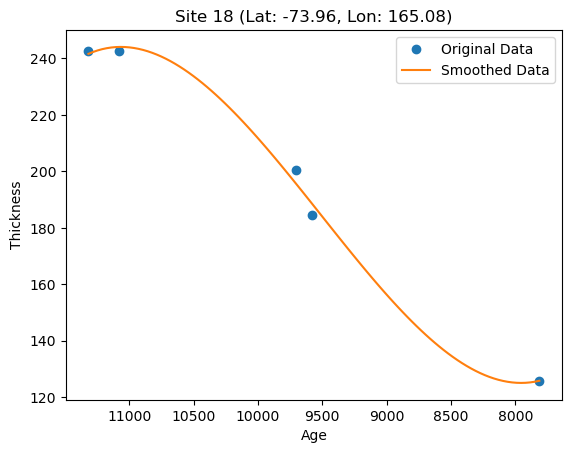

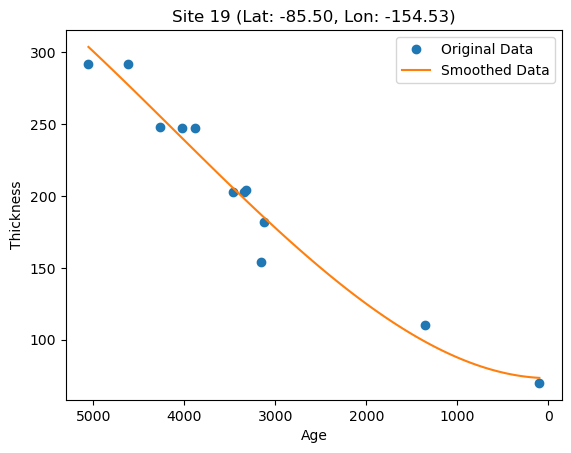

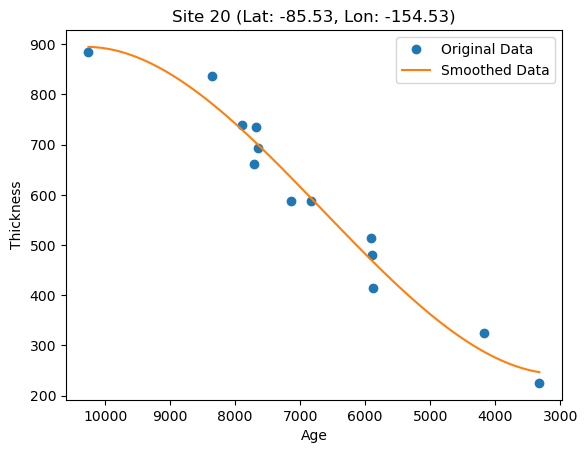

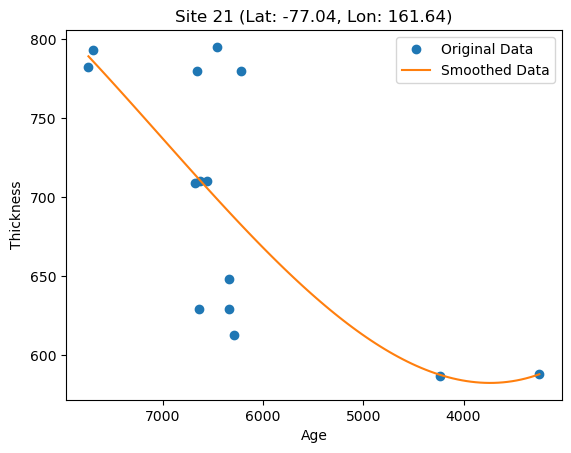

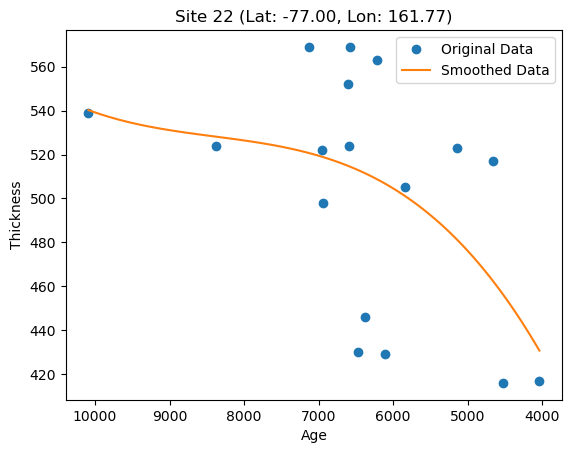

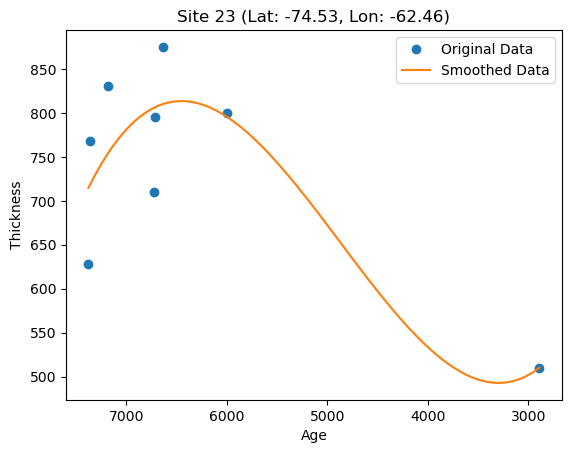

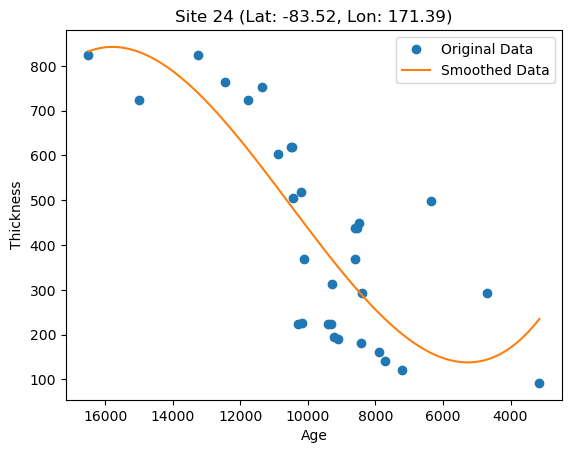

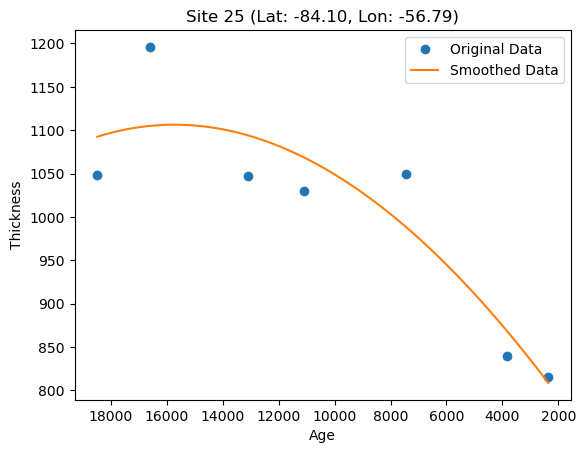

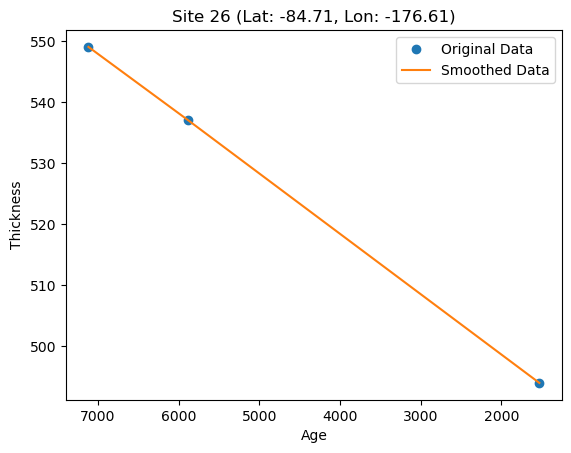

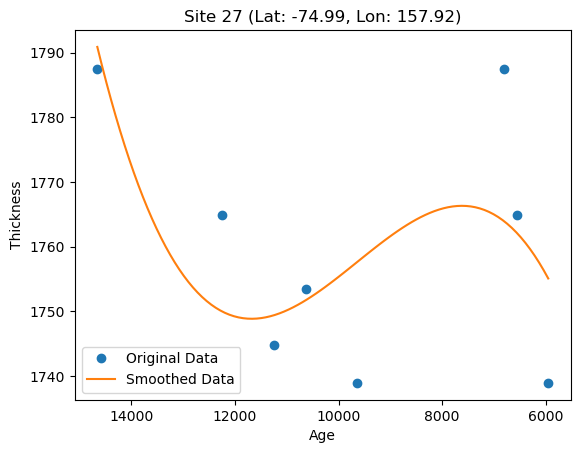

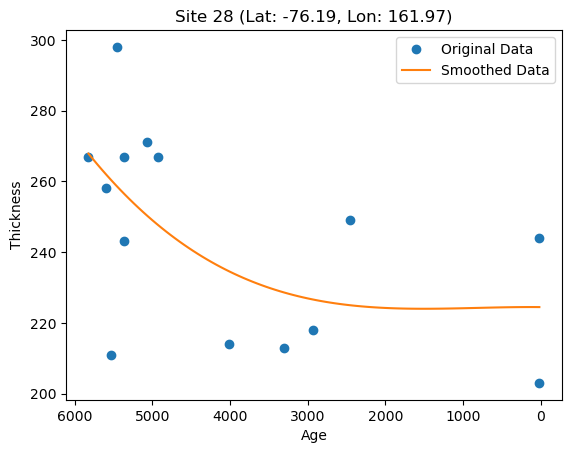

  Site         Age   Thickness       Latm       Lonm
0    1  4914.00000  467.352751 -83.687038 -59.022073
1    1  4940.89899  471.523489 -83.687038 -59.022073
2    1  4967.79798  475.716274 -83.687038 -59.022073
3    1  4994.69697  479.929952 -83.687038 -59.022073
4    1  5021.59596  484.163373 -83.687038 -59.022073
smoothed_df has been saved to smoothedthicknesstimeseries.csv


In [11]:
# Load the data
file_path = 'ThicknessTimeSeriesLatLon.csv'
df = pd.read_csv(file_path)

# Get unique sites
sites = df['Site'].unique()

# Initialize an empty DataFrame to store the smoothed results
smoothed_df = pd.DataFrame(columns=['Site', 'Age', 'Thickness', 'Latm', 'Lonm'])

# Loop through each site
for site in sites:
    site_data = df[df['Site'] == site]
    
    # Sort by Age to ensure increasing order
    site_data = site_data.sort_values(by='Age')
    x = site_data['Age'].values
    y = site_data['Thickness'].values
    
    # Extract latitude and longitude for the current site
    latm = site_data['Latm'].iloc[0]
    lonm = site_data['Lonm'].iloc[0]
    
    # Check if there are enough data points for spline fitting
    if len(x) >= 4:
        # Fit a cubic spline with a smoothing factor
        spline = UnivariateSpline(x, y, s=1e7)  # Adjust 's' for desired smoothing
        # Generate smoothed thickness values
        xnew = np.linspace(min(x), max(x), num=100)
        ynew = spline(xnew)
    else:
        # Use linear interpolation if there are fewer than 4 data points
        xnew = np.linspace(min(x), max(x), num=100)
        ynew = np.interp(xnew, x, y)
    
    # Create a DataFrame with the smoothed data for this site
    temp_df = pd.DataFrame({
        'Site': site,
        'Age': xnew,
        'Thickness': ynew,
        'Latm': latm,
        'Lonm': lonm
    })
    
    # Append the smoothed data to the main DataFrame
    smoothed_df = pd.concat([smoothed_df, temp_df], ignore_index=True)

    # Plot the original and smoothed thickness
    plt.figure()
    plt.plot(x, y, 'o', label='Original Data')
    plt.plot(xnew, ynew, '-', label='Smoothed Data')
    plt.title(f'Site {site} (Lat: {latm:.2f}, Lon: {lonm:.2f})')
    plt.xlabel('Age')
    plt.ylabel('Thickness')
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

# Now `smoothed_df` contains all the smoothed data and can be used for further modeling
print(smoothed_df.head())  # Display the first few rows of the smoothed data

# Save the smoothed data to a CSV file
output_file_path = 'smoothedthicknesstimeseries.csv'
smoothed_df.to_csv(output_file_path, index=False)

print(f'smoothed_df has been saved to {output_file_path}')

